In [96]:
%matplotlib inline
import numpy as N
import matplotlib.pyplot as P
import time
import os
import matplotlib.cm as cm
from prefig import *
from scipy.stats import kde
import matplotlib.colors as mcolors
from scipy.stats import mode
from scipy.interpolate import interp2d
from astropy.table import Table, Column, MaskedColumn, vstack

In [97]:
font = {'family':'serif', 'size':18}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium')


In [128]:
data = Table.read('gz2_gz1_extra_galex_matched_data.fits', format='fits')

In [132]:

data = data[data['IVAN_DENSITY'] > -50]
h = data
d = h[h['t01_smooth_or_features_a02_features_or_disk_debiased'] >= 0.8]
s = h[h['t01_smooth_or_features_a01_smooth_debiased'] >=0.8]

h = vstack([d, s])

In [100]:
print len(blue)
print len(green)
print len(red)

19331
3599
2995


In [101]:
print N.min(data["IVAN_DENSITY"])
data = data[data['IVAN_DENSITY'] > -50]
print len(data)

-999.0
86967


In [102]:
field = data[data['IVAN_DENSITY'] < -0.8]

In [103]:
cluster = data[data['IVAN_DENSITY'] > 0.8]

(array([ 2084.,  1597.,  1099.,   726.,   518.,   271.,   147.,    70.,
           33.,    10.]),
 array([ 0.80010003,  0.95124003,  1.10238004,  1.25352004,  1.40466005,
         1.55580005,  1.70694005,  1.85808006,  2.00922006,  2.16036007,
         2.31150007]),
 <a list of 10 Patch objects>)

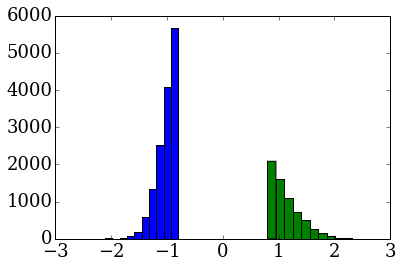

In [104]:
P.hist(field['IVAN_DENSITY'])
P.hist(cluster['IVAN_DENSITY'])

In [105]:
Hf, Xf, Yf = N.histogram2d(field['MR'], field["MU_MR"], bins=25, range=([-24, -18.0],[0.5, 3.0]))

In [106]:
Hc, Xc, Yc = N.histogram2d(cluster['MR'], cluster["MU_MR"], bins=25, range=([-24, -18.0],[0.5, 3.0]))

In [107]:
Mr = N.linspace(-24, -16, 50)
C_dash = 2.06 - 0.244*N.tanh((Mr + 20.07)/1.09)
lower = C_dash - 0.128
upper = C_dash + 0.128

(-18, -24)

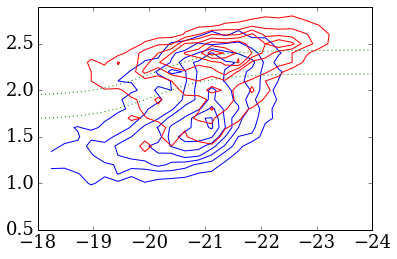

In [108]:
P.contour(Xf[:-1], Yf[:-1], Hf.T, origin='lower', colors='b')
P.contour(Xc[:-1], Yc[:-1], Hc.T, origin='lower', colors='r')
P.plot(Mr, upper, c='g', linestyle='dotted')
P.plot(Mr, lower, c='g', linestyle='dotted')
P.xlim((-18, -24))

In [109]:
Hf, Xf, Yf = N.histogram2d(field['MU_MR'], field["NUV_U"], bins=25, range=([0.5,3], [-0.5,5]))
Hc, Xc, Yc = N.histogram2d(cluster['MU_MR'], cluster["NUV_U"], bins=25, range=([0.5,3], [-0.5,5]))

(-1, 5)

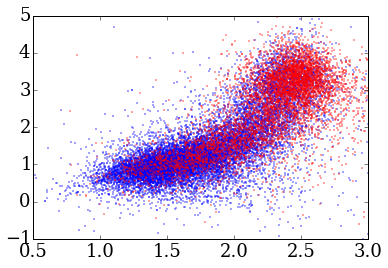

In [110]:
#P.contour(Xf[:-1], Yf[:-1], Hf.T, origin='lower', colors='b')
#P.contour(Xc[:-1], Yc[:-1], Hc.T, origin='lower', colors='r')
# P.plot(Mr, upper, c='g', linestyle='dotted')
# P.plot(Mr, lower, c='g', linestyle='dotted')
P.scatter(field['MU_MR'], field['NUV_U'], color='b', marker='x', s=1, alpha=0.5)
P.scatter(cluster['MU_MR'], cluster["NUV_U"], color='r', marker='x', s=1, alpha=0.5)
P.xlim(0.5, 3)
P.ylim(-1,5)

In [111]:
field_nb = field[field['MU_MR'] > field['lower_GV']] 

In [112]:
cluster_nb = cluster[cluster['MU_MR'] > cluster['lower_GV']]

In [113]:
len(cluster_nb)

4835

In [114]:
len(field_nb)

4413

In [115]:
Hf, Xf, Yf = N.histogram2d(field_nb['MR'], field_nb["MU_MR"], bins=25, range=([-24, -18.5],[1.5, 3.0]))

In [116]:
Hc, Xc, Yc = N.histogram2d(cluster_nb['MR'], cluster_nb["MU_MR"], bins=25, range=([-24, -18.5],[1.5, 3.0]))

(-18, -24)

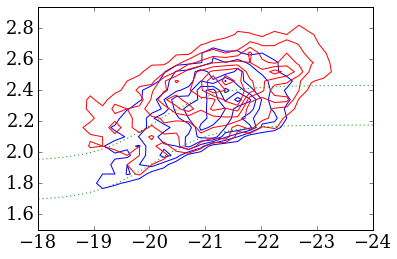

In [117]:
P.contour(Xf[:-1], Yf[:-1], Hf.T, origin='lower', colors='b')
P.contour(Xc[:-1], Yc[:-1], Hc.T, origin='lower', colors='r')
P.plot(Mr, upper, c='g', linestyle='dotted')
P.plot(Mr, lower, c='g', linestyle='dotted')
P.xlim(-18, -24)

(array([  32.,   78.,  259.,  367.,  436.,  411.,  399.,  329.,  354.,
         406.,  305.,  303.,  259.,  356.,  424.,  323.,  420.,  357.,
         373.,  364.]),
 array([ 0.0118072 ,  0.01546665,  0.0191261 ,  0.02278555,  0.026445  ,
         0.03010445,  0.0337639 ,  0.03742335,  0.0410828 ,  0.04474225,
         0.0484017 ,  0.05206115,  0.0557206 ,  0.05938005,  0.0630395 ,
         0.06669895,  0.0703584 ,  0.07401785,  0.0776773 ,  0.08133675,
         0.0849962 ]),
 <a list of 20 Patch objects>)

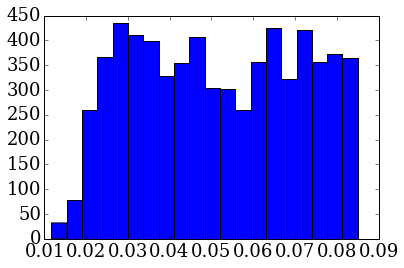

In [118]:
P.hist(cluster['z_1'], bins=20)

In [119]:
hmf = N.load('high_mass_gal_field.npy')
mmf = N.load('med_mass_gal_field.npy')
lmf = N.load('low_mass_gal_field.npy')

In [120]:
pm = data[N.where(data['IVAN_DENSITY'] < -0.8)]

abs_m_gal = pm['MR']
ur_gal = pm['MU_MR']
log_m_l = N.zeros(len(ur_gal))
m_msun = N.zeros_like(log_m_l)

for j in range(len(log_m_l)):
    if ur_gal[j] <=2.1:
        log_m_l[j] = -0.95 + 0.56 * ur_gal[j]
    else:
        log_m_l[j] = -0.16 + 0.18 * ur_gal[j]
    m_msun[j] = (((4.62 - abs_m_gal[j])/2.5) + log_m_l[j])


In [121]:
alow = pm[N.where(m_msun < 10.25)]
amed = pm[N.where(N.logical_and(m_msun > 10.25, m_msun<10.75))]
ahigh = pm[N.where(m_msun > 10.75)]


In [122]:
print len(alow), len(amed), len(ahigh)

8567 4849 1064


In [136]:
pc = h[N.where(h['IVAN_DENSITY'] < -0.8)]

abs_m_gal = pc['MR']
ur_gal = pc['MU_MR']
log_m_l = N.zeros(len(ur_gal))
m_msun = N.zeros_like(log_m_l)

for j in range(len(log_m_l)):
    if ur_gal[j] <=2.1:
        log_m_l[j] = -0.95 + 0.56 * ur_gal[j]
    else:
        log_m_l[j] = -0.16 + 0.18 * ur_gal[j]
    m_msun[j] = (((4.62 - abs_m_gal[j])/2.5) + log_m_l[j])

clow = pc[N.where(m_msun < 10.25)]
cmed = pc[N.where(N.logical_and(m_msun > 10.25, m_msun<10.75))]
chigh = pc[N.where(m_msun > 10.75)]
print len(clow), len(cmed), len(chigh)

4065 2753 482


(array([  1.53015511,   5.18552564,   9.52096511,   6.80068936,
         13.17633564,  11.81619777,  17.00172341,  21.25215426,
         25.33256788,  31.45318831]),
 array([ 0.0150587 ,  0.02204831,  0.02903792,  0.03602753,  0.04301714,
         0.05000675,  0.05699636,  0.06398597,  0.07097558,  0.07796519,
         0.0849548 ]),
 <a list of 1 Patch objects>)

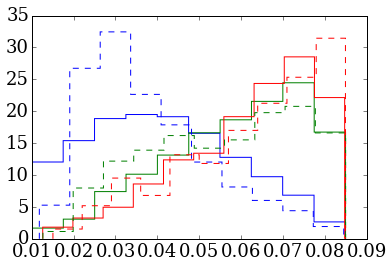

In [124]:
P.hist(alow['z_1'], normed=True, histtype='step')
P.hist(amed['z_1'], normed=True, histtype='step')
P.hist(ahigh['z_1'], normed=True, histtype='step')
P.hist(clow['z_1'], normed=True, histtype='step', color='b', linestyle='dashed')
P.hist(cmed['z_1'], normed=True, histtype='step', color='g', linestyle='dashed')
P.hist(chigh['z_1'], normed=True, histtype='step', color='r', linestyle='dashed')

In [ ]:
P.hist(field['z_1'],  normed=True)

(-1, 5)

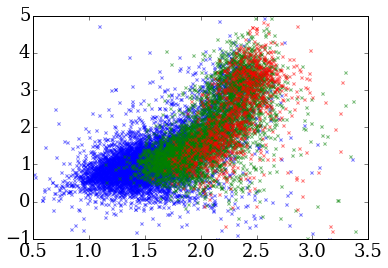

In [125]:
P.scatter(alow['MU_MR'], alow['NUV_U'], color='b', marker='x', s=10, alpha=0.5)
P.scatter(amed['MU_MR'], amed['NUV_U'], color='g', marker='x', s=10, alpha=0.5)
P.scatter(ahigh['MU_MR'], ahigh['NUV_U'], color='r', marker='x', s=10, alpha=0.5)
P.xlim(0.5, 3.5)
P.ylim(-1,5)

In [126]:
flow = Table.read('low_mass_gal_field.fits', format='fits')
fmed = Table.read('med_mass_gal_field.fits', format='fits')
fhigh = Table.read('high_mass_gal_field.fits', format='fits')

In [127]:
clow = Table.read('low_mass_gal_cluster.fits', format='fits')
cmed = Table.read('med_mass_gal_cluster.fits', format='fits')
chigh = Table.read('high_mass_gal_cluster.fits', format='fits')

 1064 1064 1064


(array([  3.92913146,   6.31467555,  10.10348088,   8.27924128,
         13.47130785,   9.96315476,  17.11978705,  22.1715275 ,
         25.96033283,  31.99435613]),
 array([ 0.0179787 ,  0.02467631,  0.03137392,  0.03807153,  0.04476914,
         0.05146675,  0.05816436,  0.06486197,  0.07155958,  0.07825719,
         0.0849548 ]),
 <a list of 1 Patch objects>)

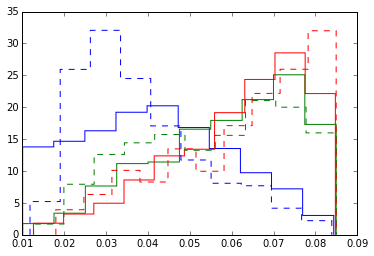

In [85]:
P.hist(flow['z_1'], normed=True, histtype='step')
P.hist(fmed['z_1'], normed=True, histtype='step')
P.hist(fhigh['z_1'], normed=True, histtype='step')
P.hist(clow['z_1'], normed=True, histtype='step', color='b', linestyle='dashed')
P.hist(cmed['z_1'], normed=True, histtype='step', color='g', linestyle='dashed')
P.hist(chigh['z_1'], normed=True, histtype='step', color='r', linestyle='dashed')

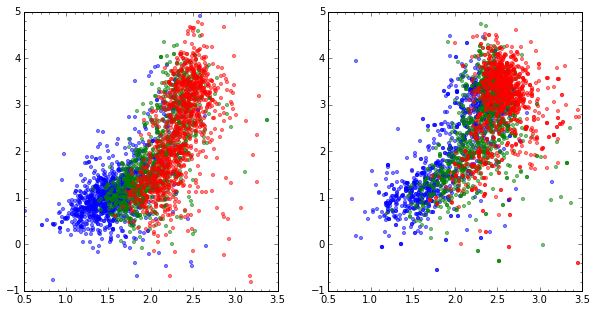

In [93]:
P.figure(figsize=(10,5))
P.subplot(121)
P.scatter(flow['MU_MR'], flow['NUV_U'], color='b', marker='o', s=10, alpha=0.5)
P.scatter(fmed['MU_MR'], fmed['NUV_U'], color='g', marker='o', s=10, alpha=0.5)
P.scatter(fhigh['MU_MR'], fhigh['NUV_U'], color='r', marker='o', s=10, alpha=0.5)
P.xlim(0.5, 3.5)
P.ylim(-1,5)
P.minorticks_on()
P.subplot(122)
P.scatter(clow['MU_MR'], clow['NUV_U'], color='b', marker='o', s=10, alpha=0.5)
P.scatter(cmed['MU_MR'], cmed['NUV_U'], color='g', marker='o', s=10, alpha=0.5)
P.scatter(chigh['MU_MR'], chigh['NUV_U'], color='r', marker='o', s=10, alpha=0.5)
P.xlim(0.5, 3.5)
P.ylim(-1,5)
P.minorticks_on()

In [94]:
Hlf, Xlf, Ylf = N.histogram2d(flow['MU_MR'], flow['NUV_U'], bins=25, range=([0.5, 3.5],[-1,5]))
Hmf, Xmf, Ymf = N.histogram2d(fmed['MU_MR'], fmed['NUV_U'], bins=25, range=([0.5, 3.5],[-1,5]))
Hhf, Xhf, Yhf = N.histogram2d(fhigh['MU_MR'], fhigh['NUV_U'], bins=25, range=([0.5, 3.5],[-1,5]))
Hlc, Xlc, Ylc = N.histogram2d(clow['MU_MR'], clow['NUV_U'], bins=25, range=([0.5, 3.5],[-1,5]))
Hmc, Xmc, Ymc = N.histogram2d(cmed['MU_MR'], cmed['NUV_U'], bins=25, range=([0.5, 3.5],[-1,5]))
Hhc, Xhc, Yhc = N.histogram2d(chigh['MU_MR'], chigh['NUV_U'], bins=25, range=([0.5, 3.5],[-1,5]))

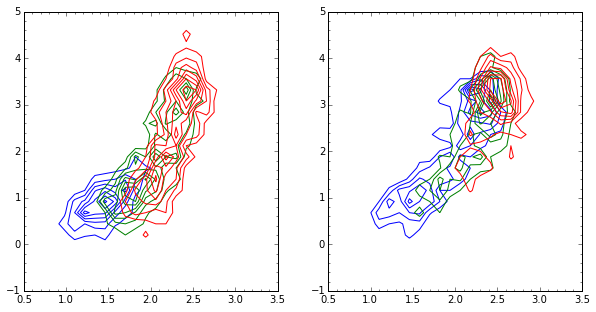

In [95]:
P.figure(figsize=(10,5))
P.subplot(121)
P.contour(Xlf[:-1], Ylf[:-1], Hlf.T, origin='lower', colors='b')
P.contour(Xmf[:-1], Ymf[:-1], Hmf.T, origin='lower', colors='g')
P.contour(Xhf[:-1], Yhf[:-1], Hhf.T, origin='lower', colors='r')
P.xlim(0.5, 3.5)
P.ylim(-1,5)
P.minorticks_on()
P.subplot(122)
P.contour(Xlc[:-1], Ylc[:-1], Hlc.T, origin='lower', colors='b', linestyle='dashed')
P.contour(Xmc[:-1], Ymc[:-1], Hmc.T, origin='lower', colors='g', linestyle='dashed')
P.contour(Xhc[:-1], Yhc[:-1], Hhc.T, origin='lower', colors='r', linestyle='dashed')
P.xlim(0.5, 3.5)
P.ylim(-1,5)
P.minorticks_on()